In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
df = pd.read_csv("health_dataset.csv")
df.head()

,age,bmi,blood_pressure,smoking_status,activity_level,disease_risk
0,22,21.5,118,0,3,0
1,35,27.8,132,1,1,1
2,41,29.4,140,0,2,1
3,29,23.1,120,0,3,0
4,52,31.8,150,1,1,1


In [73]:
#data clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             139 non-null    int64  
 1   bmi             139 non-null    float64
 2   blood_pressure  139 non-null    int64  
 3   smoking_status  139 non-null    int64  
 4   activity_level  139 non-null    int64  
 5   disease_risk    139 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


In [74]:
df.describe()

,age,bmi,blood_pressure,smoking_status,activity_level,disease_risk
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,42.848921,28.333094,137.510791,0.446043,1.899281,0.568345
std,10.061343,3.735715,14.251553,0.498878,0.810215,0.497098
min,22.000000,21.500000,116.000000,0.000000,1.000000,0.000000
25%,34.500000,25.000000,125.500000,0.000000,1.000000,0.000000
50%,42.000000,28.500000,136.000000,0.000000,2.000000,1.000000
75%,51.500000,31.200000,149.000000,1.000000,3.000000,1.000000
max,60.000000,35.100000,168.000000,1.000000,3.000000,1.000000


In [75]:
df.duplicated().sum()

np.int64(2)

In [76]:
df.isna().sum()

age               0
bmi               0
blood_pressure    0
smoking_status    0
activity_level    0
disease_risk      0
dtype: int64

In [77]:
df[df.duplicated()]

,age,bmi,blood_pressure,smoking_status,activity_level,disease_risk
102,50,31.0,149,1,1,1
123,40,27.8,132,0,2,0


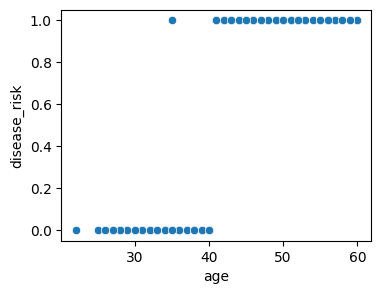

In [78]:
# data visualaization
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='disease_risk', data=df)
plt.show()

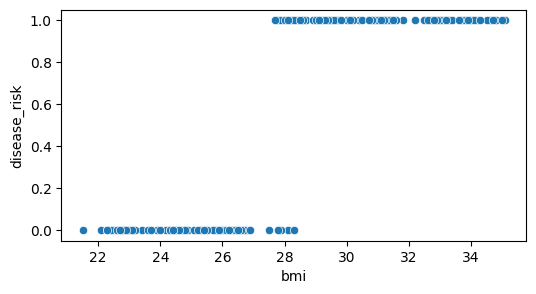

In [79]:
plt.figure(figsize=(6,3))
sns.scatterplot(x='bmi', y='disease_risk', data=df)
plt.show()

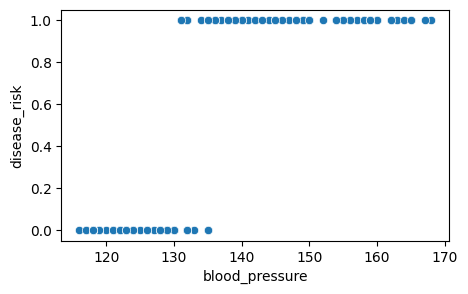

In [80]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='blood_pressure', y='disease_risk', data=df)
plt.show()

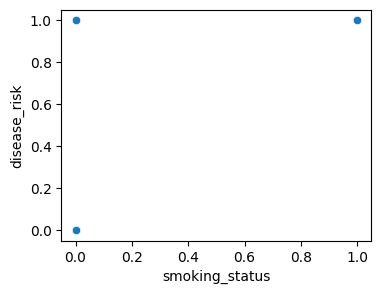

In [81]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='smoking_status', y='disease_risk', data=df)
plt.show()

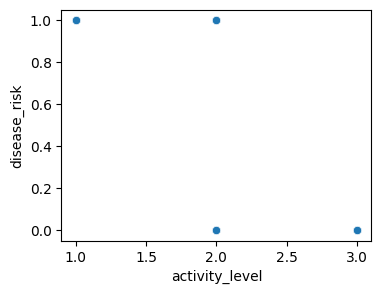

In [82]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='activity_level', y='disease_risk', data=df)
plt.show()

<Axes: xlabel='disease_risk'>

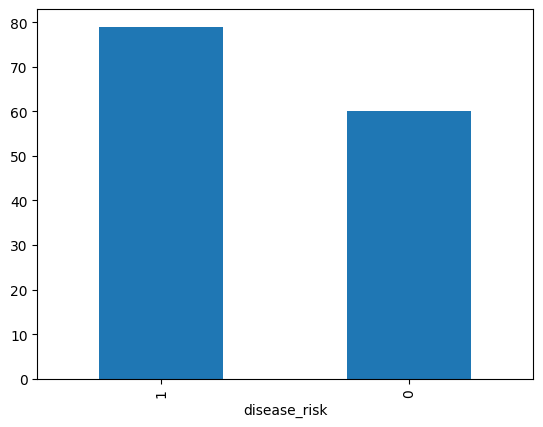

In [83]:
df['disease_risk'].value_counts().plot(kind='bar')

In [84]:
#feature target split
x = df[['age']]
y = df[['disease_risk']]

In [85]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [86]:
xtrain.head()

,age
16,31
18,39
10,27
56,34
104,33


In [87]:
ytrain.head()

,disease_risk
16,0
18,0
10,0
56,0
104,0


In [88]:
xtest.head()

,age
135,38
66,35
31,32
118,57
42,40


In [89]:
ytest.head()

,disease_risk
135,0
66,0
31,0
118,1
42,0


In [90]:
#model implrmentation
lr = LinearRegression()

In [91]:
linear_model = lr.fit(xtrain, ytrain)

In [92]:
linear_model.score(xtrain, ytrain)

0.6930352248434661

In [93]:
linear_model.score(xtest, ytest)

0.6832303590659923

In [94]:
#slope
m = linear_model.coef_
m

array([[0.04105954]])

In [95]:
c = linear_model.coef_
c

array([[0.04105954]])

In [96]:
lin_pred_y = linear_model.predict(xtest)

In [97]:
lin_pred_y

array([[ 0.4015038 ],
       [ 0.27832518],
       [ 0.15514657],
       [ 1.18163501],
       [ 0.48362287],
       [ 0.31938472],
       [ 0.44256333],
       [ 1.14057547],
       [ 0.27832518],
       [ 0.56574195],
       [ 1.26375409],
       [ 0.0730275 ],
       [ 0.31938472],
       [ 1.30481362],
       [ 1.01739686],
       [ 0.0730275 ],
       [ 0.85315871],
       [ 1.09951593],
       [ 1.22269455],
       [ 0.97633732],
       [ 0.27832518],
       [ 0.23726565],
       [ 0.44256333],
       [ 0.97633732],
       [ 1.22269455],
       [ 0.36044426],
       [ 0.52468241],
       [-0.00909158]])

In [98]:
#mae 
mae = mean_absolute_error(xtest, lin_pred_y)
mae

42.804172999764816

In [99]:
mse = mean_squared_error(xtest, lin_pred_y)
mse

1929.3710413940478

In [100]:
r2 = r2_score(xtest, lin_pred_y)
r2

-17.257856513771408

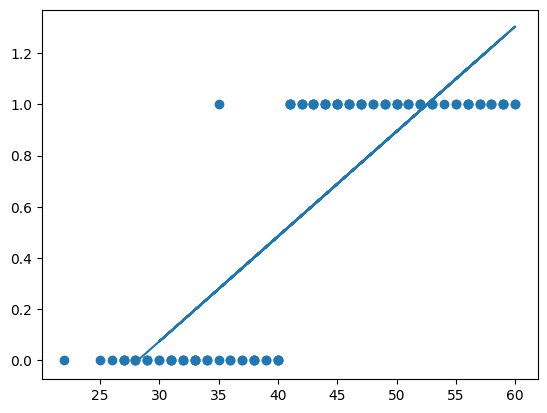

In [101]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, lin_pred_y)
plt.show()

end of linear regression but it not legal in cetagoriacl type data

In [102]:
#logistic regression
log = LogisticRegression()

In [103]:
log_model = log.fit(xtrain, ytrain)
log_model

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [104]:
log_model.score(xtrain, ytrain)

0.990990990990991

In [105]:
log_model.score(xtest, ytest)

1.0

In [106]:
log_pred_y = log_model.predict(xtest)

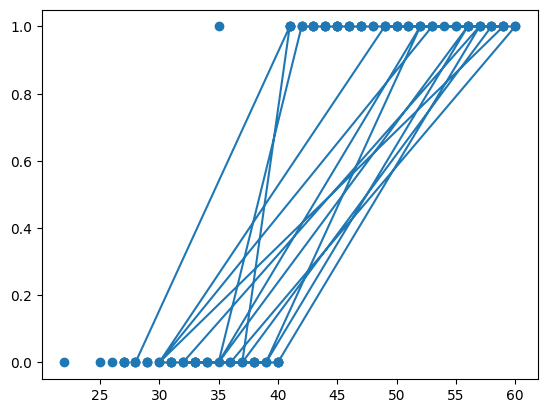

In [107]:
plt.scatter(xtrain, ytrain)
plt.plot(xtest, log_pred_y)
plt.show()

In [116]:
log_pred_pro = log_model.predict_proba(xtest)
log_pred_pro

array([[8.77031854e-01, 1.22968146e-01],
       [9.91471692e-01, 8.52830804e-03],
       [9.99472577e-01, 5.27422613e-04],
       [1.49964892e-07, 9.99999850e-01],
       [5.25934291e-01, 4.74065709e-01],
       [9.78655918e-01, 2.13440822e-02],
       [7.37734017e-01, 2.62265983e-01],
       [3.80237020e-07, 9.99999620e-01],
       [9.91471692e-01, 8.52830804e-03],
       [1.47171829e-01, 8.52828171e-01],
       [2.33270520e-08, 9.99999977e-01],
       [9.99917923e-01, 8.20771784e-05],
       [9.78655918e-01, 2.13440822e-02],
       [9.20015120e-09, 9.99999991e-01],
       [6.19792859e-06, 9.99993802e-01],
       [9.99917923e-01, 8.20771784e-05],
       [2.56092949e-04, 9.99743907e-01],
       [9.64093253e-07, 9.99999036e-01],
       [5.91459128e-08, 9.99999941e-01],
       [1.57147448e-05, 9.99984285e-01],
       [9.91471692e-01, 8.52830804e-03],
       [9.96618987e-01, 3.38101282e-03],
       [7.37734017e-01, 2.62265983e-01],
       [1.57147448e-05, 9.99984285e-01],
       [5.914591

In [135]:
new_xtest = np.linspace(xtest.min(), xtest.max(), 200)

In [141]:
pred_pro = log_model.predict_proba(new_xtest)[:, 0]

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [142]:
print(new_xtest.shape)
print(pred_pro.shape)

(200, 1)
(200,)


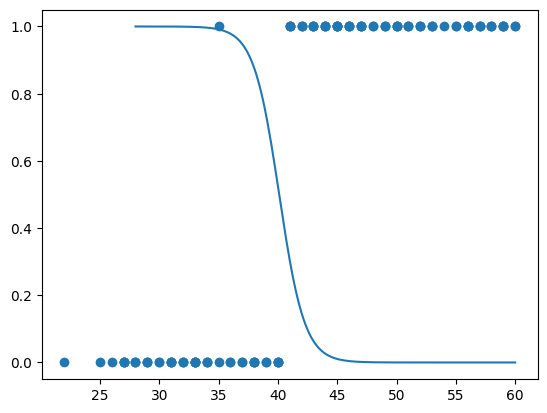

In [143]:
plt.scatter(xtrain, ytrain)
plt.plot(new_xtest, pred_pro)
plt.show()

In [144]:
pred_pro = log_model.predict_proba(new_xtest)[:, 1]

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


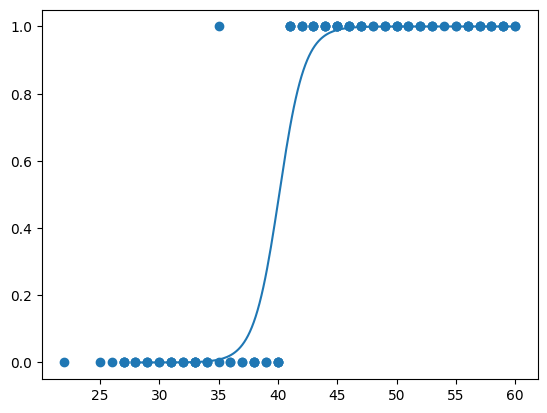

In [145]:
plt.scatter(xtrain, ytrain)
plt.plot(new_xtest, pred_pro)
plt.show()

In [108]:
new_x = np.linspace(x.min(), x.max(), 1000).reshape(-1,1)
new_x

array([[22.        ],
       [22.03803804],
       [22.07607608],
       [22.11411411],
       [22.15215215],
       [22.19019019],
       [22.22822823],
       [22.26626627],
       [22.3043043 ],
       [22.34234234],
       [22.38038038],
       [22.41841842],
       [22.45645646],
       [22.49449449],
       [22.53253253],
       [22.57057057],
       [22.60860861],
       [22.64664665],
       [22.68468468],
       [22.72272272],
       [22.76076076],
       [22.7987988 ],
       [22.83683684],
       [22.87487487],
       [22.91291291],
       [22.95095095],
       [22.98898899],
       [23.02702703],
       [23.06506507],
       [23.1031031 ],
       [23.14114114],
       [23.17917918],
       [23.21721722],
       [23.25525526],
       [23.29329329],
       [23.33133133],
       [23.36936937],
       [23.40740741],
       [23.44544545],
       [23.48348348],
       [23.52152152],
       [23.55955956],
       [23.5975976 ],
       [23.63563564],
       [23.67367367],
       [23

In [109]:
pred = log_model.predict(new_x)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [110]:
x.shape

(139, 1)

In [111]:
y.shape

(139, 1)

In [131]:
print(new_x.shape)
print(pred.shape)

(1000, 1)
(1000,)


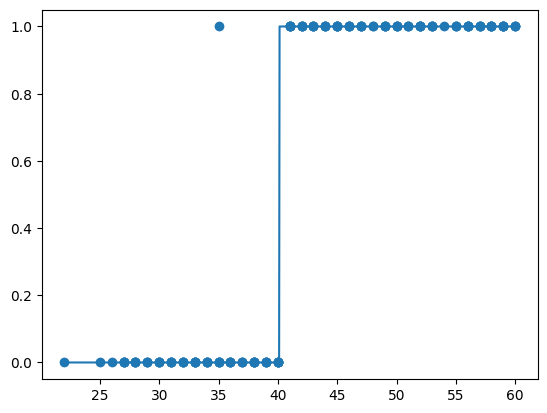

In [112]:
plt.scatter(x, y)
plt.plot(new_x, pred)
plt.show()

In [117]:
pred_data = log_model.predict_proba(new_x)[:, 0]
pred_data

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([9.99999952e-01, 9.99999950e-01, 9.99999948e-01, 9.99999947e-01,
       9.99999945e-01, 9.99999943e-01, 9.99999941e-01, 9.99999938e-01,
       9.99999936e-01, 9.99999934e-01, 9.99999932e-01, 9.99999929e-01,
       9.99999927e-01, 9.99999924e-01, 9.99999921e-01, 9.99999918e-01,
       9.99999915e-01, 9.99999912e-01, 9.99999909e-01, 9.99999906e-01,
       9.99999902e-01, 9.99999899e-01, 9.99999895e-01, 9.99999892e-01,
       9.99999888e-01, 9.99999884e-01, 9.99999879e-01, 9.99999875e-01,
       9.99999871e-01, 9.99999866e-01, 9.99999861e-01, 9.99999856e-01,
       9.99999851e-01, 9.99999845e-01, 9.99999840e-01, 9.99999834e-01,
       9.99999828e-01, 9.99999822e-01, 9.99999816e-01, 9.99999809e-01,
       9.99999802e-01, 9.99999795e-01, 9.99999788e-01, 9.99999780e-01,
       9.99999772e-01, 9.99999764e-01, 9.99999755e-01, 9.99999746e-01,
       9.99999737e-01, 9.99999728e-01, 9.99999718e-01, 9.99999708e-01,
       9.99999697e-01, 9.99999686e-01, 9.99999675e-01, 9.99999663e-01,
      

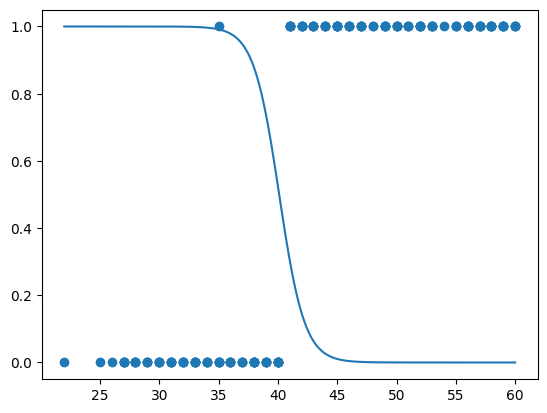

In [119]:
plt.scatter(x,y)
plt.plot(new_x, pred_data)
plt.show()

In [121]:
pred_data = log_model.predict_proba(new_x)[:,1]
pred_data

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4.80550301e-08, 4.97861666e-08, 5.15796658e-08, 5.34377740e-08,
       5.53628188e-08, 5.73572115e-08, 5.94234502e-08, 6.15641233e-08,
       6.37819120e-08, 6.60795945e-08, 6.84600488e-08, 7.09262566e-08,
       7.34813073e-08, 7.61284012e-08, 7.88708541e-08, 8.17121012e-08,
       8.46557016e-08, 8.77053423e-08, 9.08648434e-08, 9.41381625e-08,
       9.75293998e-08, 1.01042803e-07, 1.04682774e-07, 1.08453870e-07,
       1.12360817e-07, 1.16408508e-07, 1.20602013e-07, 1.24946585e-07,
       1.29447666e-07, 1.34110895e-07, 1.38942111e-07, 1.43947368e-07,
       1.49132934e-07, 1.54505305e-07, 1.60071210e-07, 1.65837622e-07,
       1.71811763e-07, 1.78001117e-07, 1.84413437e-07, 1.91056754e-07,
       1.97939390e-07, 2.05069967e-07, 2.12457415e-07, 2.20110990e-07,
       2.28040276e-07, 2.36255208e-07, 2.44766075e-07, 2.53583537e-07,
       2.62718640e-07, 2.72182826e-07, 2.81987951e-07, 2.92146295e-07,
       3.02670584e-07, 3.13574000e-07, 3.24870201e-07, 3.36573336e-07,
      

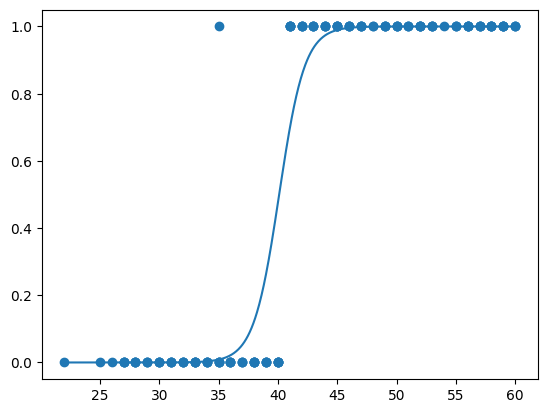

In [122]:
plt.scatter(x,y)
plt.plot(new_x, pred_data)
plt.show()